In [22]:
# 비지도 학습 

# 초기화:
# K개의 클러스터를 나타내기 위한 초기 중심(centroid)을 무작위로 선택 / 이 중심은 각 클러스터의 중심 위치를 나타내며, 클러스터의 평균적인 특성을 대표

# 할당:
# 각 데이터 포인트를 가장 가까운 클러스터 중심에 할당 / 이 과정에서는 일반적으로 유클리드 거리(두 점 사이의 거리를 계산)가 사용되어 각 데이터 포인트와 중심점 사이의 거리를 계산하고, 가장 짧은 거리를 가진 클러스터에 데이터 포인트를 할당

# 업데이트:
# 모든 데이터 포인트가 클러스터에 할당된 후, 각 클러스터의 새로운 중심을 계산 / 이는 클러스터에 할당된 모든 데이터 포인트의 평균 위치를 취함으로써 이루어짐.

# 반복:
# 새로운 중심을 기반으로 데이터 포인트의 클러스터 할당을 다시 수행하고, 다시 중심을 업데이트 / 이 과정은 클러스터의 변화가 없거나, 특정 반복 횟수에 도달하거나, 다른 종료 조건을 만족할 때까지 계속 반복ㄴ


In [23]:
# 유사도 

# 연속적인 특성을 가진 샘플을 클러스터로 묶는 데 널리 사용되는 거리는 m-차원 공간에 있는 두 포인트 x와 y사이의 유클리디안 거리의 제곱(squaredEuclidean distance)

In [24]:
# 1. 사이킷런 실습-데이터 준비

# make_blobs함수 사용하여 랜덤하게 생성
# • n_samples: 생성할 샘플의 수
# • n_features: 각 샘플의 특징(특성) 수
# • centers: 생성할 군집(클러스터)의 수
# • cluster_std: 각 군집의 표준편차
# • shuffle: 샘플을 섞을지 여부
# • random_state: 랜덤 SEED 지정

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=4,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=0)
# 비지도 학습이므로 레이블(정답)인 y는 사용하지 않을 예정
X.shape

(150, 2)

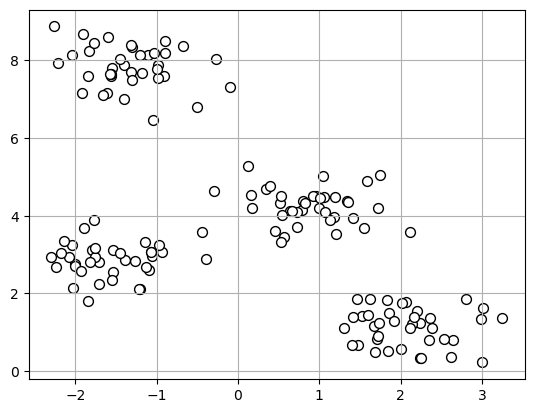

In [25]:
# 시각화하여 확인
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)  # 산점도 생성 / X[:, 0], X[:, 1]: X는 2차원 배열로 가정하며
# X[:, 0]은 모든 행의 첫 번째 열(예: x축 좌표), X[:, 1]은 모든 행의 두 번째 열(예: y축 좌표)을 의미합니다.
plt.grid()  # 격자
plt.show()

In [26]:
X

array([[ 0.3498724 ,  4.69253251],
       [ 1.05374379,  4.49286859],
       [-0.91506423,  7.60510012],
       [ 0.802314  ,  4.38196181],
       [ 1.59141542,  4.90497725],
       [ 2.34356293,  0.79351428],
       [ 0.5226209 ,  4.32976003],
       [-1.84871321,  1.80618069],
       [-1.79833475,  3.12590728],
       [-0.98631026,  7.87967106],
       [ 0.78260667,  4.15263595],
       [ 2.06051753,  1.79059891],
       [-1.71149493,  2.79819267],
       [ 1.67030948,  1.16728826],
       [-1.3035261 ,  8.34554637],
       [-1.91538501,  7.16210126],
       [-1.61105446,  7.14377804],
       [-1.77592024,  3.88264829],
       [ 2.64465731,  0.80770124],
       [-1.10508393,  8.13988193],
       [ 0.72086751,  3.71347124],
       [ 2.3914149 ,  1.10139458],
       [-2.03972497,  8.14064971],
       [ 0.56969694,  3.44064603],
       [-1.5942807 ,  8.60364854],
       [ 1.34081536,  4.36827878],
       [-1.0487326 ,  6.44916364],
       [-1.40369886,  7.8841601 ],
       [-0.30022483,

In [27]:
# cluster 모듈의 KMeans 클래스를 적용
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4,
            init='random',      # 초기 클러스터 중심 위치를 무작위
            n_init=10,           # 알고리즘이 독립적으로 초기 중심을 설정하여 10번 실행되고, 이 중 가장 좋은 결과를 최종 모델로 선택
            max_iter=300,       # 각 K-means 실행의 최대 반복 횟수를 300
            tol=1e-04,          # 반복을 중지할 수 있는 변화의 최소량을 나타내며, 이 값이 클러스터 내 오차의 변화가 0.0001보다 작아지면 반복이 중지
            random_state=0)     # 시드값 0.

y_km = km.fit_predict(X)            # 데이터를 클러스터에 할당하는 동시에 모델을 학습
y_km

array([2, 2, 0, 2, 2, 1, 2, 3, 3, 0, 2, 1, 3, 1, 0, 0, 0, 3, 1, 0, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 3, 2, 3, 0, 0, 1, 0, 2, 3, 3, 3, 2, 1,
       3, 3, 3, 0, 1, 1, 3, 0, 0, 0, 2, 3, 1, 2, 3, 1, 1, 1, 1, 3, 0, 0,
       2, 3, 3, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 3, 2, 1, 0, 3, 2, 1, 0, 2,
       2, 1, 1, 3, 3, 0, 3, 3, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 3, 1, 1,
       3, 2, 0, 2, 2, 2, 3, 0, 2, 3, 0, 1, 2, 2, 2, 0, 0, 0, 2, 3, 3, 3,
       1, 3, 0, 3, 3, 3, 1, 0, 0, 2, 0, 1, 0, 2, 2, 3, 1, 0], dtype=int32)

In [28]:
km.cluster_centers_ #센트로이드 좌표

array([[-1.32931949,  7.83606554],
       [ 2.08356978,  1.13724593],
       [ 0.88922686,  4.24805239],
       [-1.55311219,  2.87260114]])

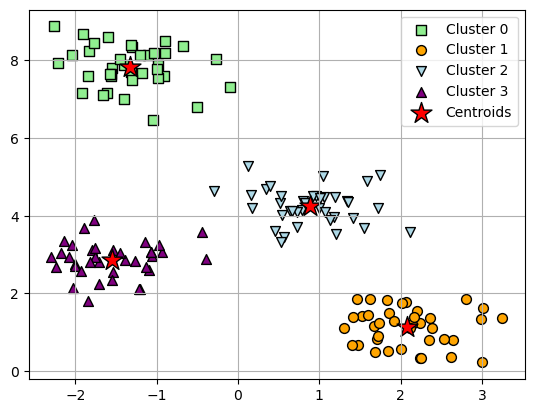

In [29]:
# 학습한 결과 시각화하여 확인

#Cluster 0 그리기
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 0')

#Cluster 1 그리기
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 1')

#Cluster 2 그리기
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 2')

# 클러스터 3 시각화
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='purple', marker='^', edgecolor='black', label='Cluster 3')

#센트로이드 그리기
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [30]:
print('SSE: %.2f' % km.inertia_)

SSE: 70.84


In [31]:
# k-평균이 이런 작은 데이터셋에서 잘 작동하지만 k-평균 알고리즘은 클러스터 개수 k를 사전에 지정해야 하는 중요한 단점이 있음
#  클러스터 개수를 얼마로 선택할지는 실제 애플리케이션에서는 명확하지 않을 수 있음

# 당장 예로 데이터 생성할 때 클러스터를 3으로 하고 k-means 클러스터링을 할때 클러스터 수를 4로 하면 나눌 필요가 없는 데이터 군집을 굳이 나눔 

# ------------------------------------------------------------------------------------------------------------------------

# 클러스터랑 데이터 특징의 관계 
# 데이터의 차원과 각 차원의 특성, 그리고 목표하는 클러스터 수가 서로 조화롭게 작용하여 클러스터링의 효과를 최대화

# 클러스터 수와 데이터 구조: 클러스터 수는 데이터의 구조와 밀접하게 관련되어 있습니다. 적절한 클러스터 수를 선택하는 것은 데이터 내의 자연스러운 그룹을 효과적으로 식별하는 데 중요합니다. 클러스터 수를 결정할 때는 데이터의 분포, 특성의 개수 및 성격, 그리고 분석 목적을 고려해야 합니다.
# 알고리즘과 클러스터 수: 클러스터 수의 결정은 사용하는 클러스터링 알고리즘의 특성에도 영향을 받습니다. 예를 들어, K-means는 지정된 클러스터 수에 맞춰 데이터를 강제로 그룹화하지만, DBSCAN과 같은 밀도 기반 알고리즘은 데이터 자체에서 자연스럽게 형성되는 클러스터 수를 탐지합니다.

In [32]:
# k-평균 ++(k-means++)

# 초기 센트로이드가 좋지 않게 선택되면 이따금 나쁜 군집 결과를 만들거나 수렴이 느려짐
# • 이 문제를 해결하는 한 가지 방법은 같은 데이터셋에서 k-평균 알고리즘을 여러 번 실행하여 SSE 입장에서 가장 성능이 좋은 모델을 선택하는 것
# • 또 다른 방법은 k-평균++ 알고리즘을 통해 초기 센트로이드가 서로 멀리 떨어지도록 위치시키는 것

# 결론 - > 일반 케이민은 계속 무작위로 센트로이드 선택 하고 케이 플플은 전 선택에 기반한 가중치를 사용한다 (성능 향상)

In [33]:
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)
y_km

array([3, 3, 0, 3, 3, 2, 3, 1, 1, 0, 3, 2, 1, 2, 0, 0, 0, 1, 2, 0, 3, 2,
       0, 3, 0, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 0, 2, 0, 3, 1, 1, 1, 3, 2,
       1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 3, 1, 2, 3, 1, 2, 2, 2, 2, 1, 0, 0,
       3, 1, 1, 3, 2, 2, 2, 3, 3, 3, 1, 2, 2, 1, 3, 2, 0, 1, 3, 2, 0, 3,
       3, 2, 2, 1, 1, 0, 1, 1, 2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       1, 3, 0, 3, 3, 3, 1, 0, 3, 1, 0, 2, 3, 3, 3, 0, 0, 0, 3, 1, 1, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 3, 0, 2, 0, 3, 3, 1, 2, 0], dtype=int32)

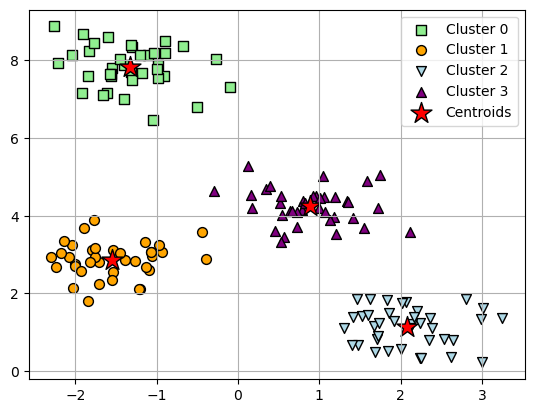

In [34]:
# 학습한 결과 시각화하여 확인

#Cluster 0 그리기
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 0')

#Cluster 1 그리기
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 1')

#Cluster 2 그리기
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 2')

# 클러스터 3 시각화
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='purple', marker='^', edgecolor='black', label='Cluster 3')

#센트로이드 그리기
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [35]:
print('SSE: %.2f' % km.inertia_)   #  클러스터 내 오차 제곱 합(Sum of Squared Errors, SSE)

SSE: 70.84


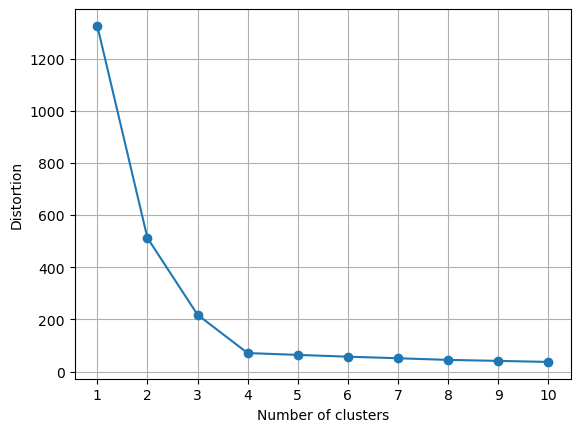

In [37]:
# 엘보우 방법 성능 평가 

# SSE를 바탕으로 엘보우 방법이라고 하는 그래프를 사용하여 문제에 최적인 클러스터 개수 k를 추정할 수 있음
#  직관적으로 생각했을 때 k가 증가하면 왜곡은 줄어들 것
#  샘플이 할당된 센트로이드에 더 가까워지기 때문임
#  엘보우 방법 이면에 있는 아이디어는 SSE가 수렴하는지점의 k 값을 찾는 것
#  k 값을 바꾸어 가며 왜곡 값을 그래프로 그리면 명확하게 알 수 있음
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,      # 클러스터 수 만큼 반복 
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xticks(range(1, 11))
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')    # 왜곡
plt.show()


# 엘보우 방법은 왜곡의 감소가 급격히 줄어드는 클러스터 수를 찾는 방법으로, 이 지점을 최적의 클러스터 수로 선택 
# 이 그래프에서는 왜곡이 급격히 감소하는 지점을 찾아 그 지점 이후로는 추가 클러스터가 상대적으로 작은 성능 개선
# 아래 결과에선 클러스터 수는 4가 최적임을 알 수 있음

In [38]:
# 실루엣 분석 

# k-평균 이외에 다른 군집 알고리즘에도 적용할 수 있음
#  실루엣 분석은 클러스터 내 샘플들이 얼마나 조밀하게 모여 있는지를 측정하는 그래프 도구
#  데이터셋 샘플 하나에 대한 실루엣 계수(silhouette coefficient)를 계산하려면 다음 세 가지 단계를 적용
# 1. 내부 거리 계산 (a(i))각 데이터 포인트 i에 대해 해당 데이터 포인트가 속한 클러스터 내의 모든 다른 데이터 포인트들과의 거리를 평균화합니다. 
# 이 평균 거리를 내부 거리라고 하며, 이는 데이터 포인트i가 자신의 클러스터에 얼마나 잘 맞는지(즉, 얼마나 근접하게 위치하는지)를 나타냄
# 2. 최소 외부 거리 계산 (b(i))데이터 포인트 i에 대해, 다른 모든 클러스터에 속한 데이터 포인트들과의 거리를 평균화한 후, 이 평균 거리들 중 최소값을 선택합니다. 이 최소값은 최소 외부 거리라고 하며, 
# 데이터 포인트 i가 가장 가까운 다른 클러스터에 얼마나 멀리 떨어져 있는지를 나타냄
# 3. 실루엣 계수 계산 (s(i)) 마지막으로, 내부 거리와 최소 외부 거리를 사용하여 각 데이터 포인트의 실루엣 계수를 계산
# b(j) ≫ a(j)이면 이상적인 실루엣 계수 1에 가깝게 됨
# • b(j)는 샘플이 다른 클러스터와 얼마나 다른지 나타내고, a(j)는 클러스터 내다른 샘플과 얼마나 비슷한지 나타내기 때문임


# 실루엣 계수는 클러스터 내의 밀집도와 클러스터 간의 분리도를 함께 고려한 지표
# 실루엣 계수는 각 데이터 포인트에 대해 계산되며, -1에서 +1 사이의 값을 가집니다. 계수 값이 높을수록 클러스터링 결과가 좋다고 평가

In [51]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

# 응집도 
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') # silhouette_samples: 이 함수는 데이터셋 X의 각 샘플에 대해 실루엣 계수를 계산 / 
# 계수는 클러스터 내 데이터와 다른 클러스터와의 거리를 기반으로 하여 각 데이터 포인트가 얼마나 잘 클러스터링되었는지를 나타냄
#  계산된 각 데이터 포인트의 실루엣 계수를 포함하는 배열
silhouette_avg = np.mean(silhouette_vals)   # 모든 실루엣 계수의 평균을 계산하여, 전체 클러스터링의 평균 실루엣 점수를 얻는다. 
# 이 평균 점수는 클러스터링의 전반적인 품질을 나타냄 / 평균 실루엣 점수가 높을수록 클러스터 간에 잘 구분되고 클러스터 내의 응집력이 강함을 의미

silhouette_avg

0.722981016944496

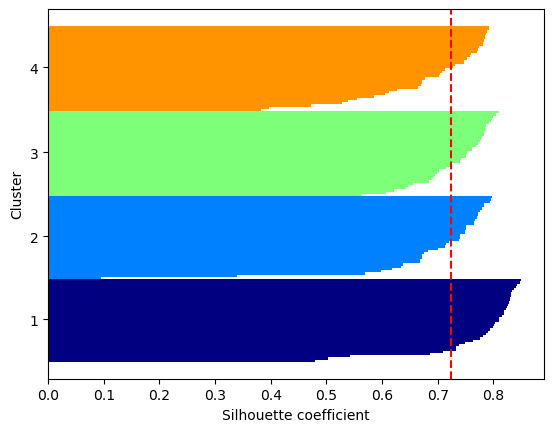

In [52]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 클러스터 레이블을 고유 값
cluster_labels = np.unique(y_km)

# 클러스터의 개수.
n_clusters = cluster_labels.shape[0]

# y축의 하단과 상단을 초기화
y_ax_lower, y_ax_upper = 0, 0

# y축의 틱 레이블을 저장할 리스트를 초기화
yticks = []

for i, c in enumerate(cluster_labels):
    # 해당 클러스터의 실루엣 값
    c_silhouette_vals = silhouette_vals[y_km == c]
    # 실루엣 값을 정렬
    c_silhouette_vals.sort()
    # y축의 상단 값을 업데이트
    y_ax_upper += len(c_silhouette_vals)
    # 색상을 설정
    color = cm.jet(float(i) / n_clusters)
    # 수평 막대 그래프를 그리기
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)
    # y축 틱 레이블의 위치 저장
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    # y축의 하단 값 업데이트
    y_ax_lower += len(c_silhouette_vals)

# 실루엣 평균 값 -  수직 점선
plt.axvline(silhouette_avg, color="red", linestyle="--")

# y축 틱 레이블을 설정합니다.
plt.yticks(yticks, cluster_labels + 1)
# y축 레이블 .
plt.ylabel('Cluster')
# x축 레이블
plt.xlabel('Silhouette coefficient')
# 그래프 표시
plt.show()

 클러스터 크기를 확인하고 이상치를 가진 클러스터를 구별할 수 있음
 실루엣 계수의 값이 0에서 멀리 떨어져 있음
 이는 군집이 잘 되었다는 것을 나타냄
 또 군집 품질을 요약하기 위해 평균 실루엣 계수를 그래프에 추가(점선)

잘못 클러스터링 k = 2인 경우 

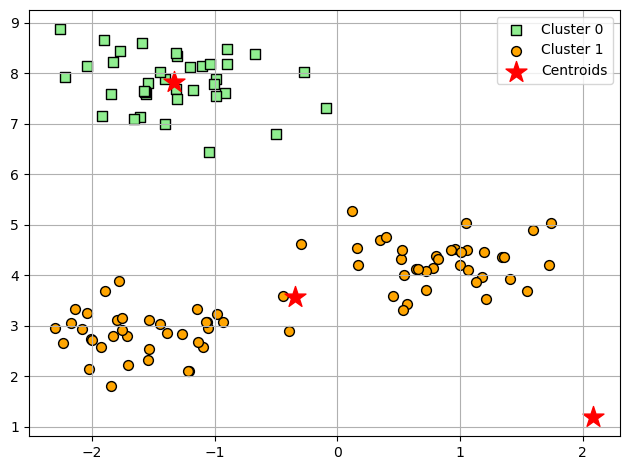

In [53]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 0')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 1')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [54]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals)
silhouette_avg

0.6250938560079358

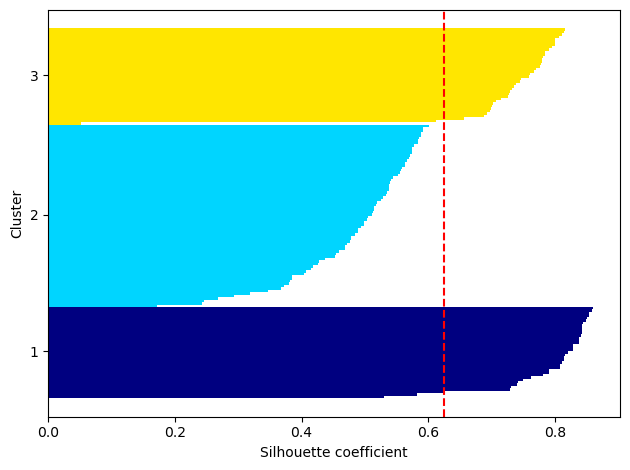

In [55]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()